# Tutorial 7B: Data Discretisation: 


# Binning: 
Binning aims to discretise continuous values into discrete bins. We explain in the following different ways for implementing  binning with Python.  

## A. Using the digitize() method:

In [1]:
import numpy as np
np.random.seed(1234) # make it reproducible

n = 100 # how much data
data = np.random.random(n) # n random numbers on 0..1

bins = np.linspace(0, 1, 11) # equally spaced bins, from 0 to 1.0 
# 11 bin 'edges' or boundaries, gives us 10 bins

digitized = np.digitize(data, bins) # put the n in the b


In [2]:
len(bins), bins # there are 11 bin boundaries or 'edges', i.e. 10 bins 
# 0 to 0.1... 0.9, 1.0 i.e. 10 bins, it's tidier

(11, array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]))

In [3]:
data

array([ 0.19151945,  0.62210877,  0.43772774,  0.78535858,  0.77997581,
        0.27259261,  0.27646426,  0.80187218,  0.95813935,  0.87593263,
        0.35781727,  0.50099513,  0.68346294,  0.71270203,  0.37025075,
        0.56119619,  0.50308317,  0.01376845,  0.77282662,  0.88264119,
        0.36488598,  0.61539618,  0.07538124,  0.36882401,  0.9331401 ,
        0.65137814,  0.39720258,  0.78873014,  0.31683612,  0.56809865,
        0.86912739,  0.43617342,  0.80214764,  0.14376682,  0.70426097,
        0.70458131,  0.21879211,  0.92486763,  0.44214076,  0.90931596,
        0.05980922,  0.18428708,  0.04735528,  0.67488094,  0.59462478,
        0.53331016,  0.04332406,  0.56143308,  0.32966845,  0.50296683,
        0.11189432,  0.60719371,  0.56594464,  0.00676406,  0.61744171,
        0.91212289,  0.79052413,  0.99208147,  0.95880176,  0.79196414,
        0.28525096,  0.62491671,  0.4780938 ,  0.19567518,  0.38231745,
        0.05387369,  0.45164841,  0.98200474,  0.1239427 ,  0.11

In [4]:
data.min(), data.max(), data.mean(), data.std()

(0.0062085165871293979,
 0.99208146618836146,
 0.51836290787880246,
 0.27671876680061797)

In [5]:
digitized # so the 100 values are now group into 10 bins

array([ 2,  7,  5,  8,  8,  3,  3,  9, 10,  9,  4,  6,  7,  8,  4,  6,  6,
        1,  8,  9,  4,  7,  1,  4, 10,  7,  4,  8,  4,  6,  9,  5,  9,  2,
        8,  8,  3, 10,  5, 10,  1,  2,  1,  7,  6,  6,  1,  6,  4,  6,  2,
        7,  6,  1,  7, 10,  8, 10, 10,  8,  3,  7,  5,  2,  4,  1,  5, 10,
        2,  2,  8,  6,  5,  2,  3,  9,  5,  6,  1,  4,  5,  7, 10,  7,  8,
        2,  8,  9,  7,  5,  2,  6,  6, 10,  5,  6,  6,  9,  1,  7])

In [6]:
# not so easy to look at so put them side by side in a DataFrame
import pandas as pd
df = pd.DataFrame({"Data" : data, "DigBin" : digitized})

In [7]:
df.DigBin.value_counts().sort_index() 
# and there are the 10 bins,change the seed above from '1234' to something else to see 

1      9
2     10
3      5
4      9
5     10
6     15
7     12
8     12
9      8
10    10
Name: DigBin, dtype: int64

In [8]:
df.head()

,Data,DigBin
0,0.191519,2
1,0.622109,7
2,0.437728,5
3,0.785359,8
4,0.779976,8


In [9]:
df.sort_values("Data")
# df.sort_values("DigBin").head()

,Data,DigBin
78,0.006209,1
53,0.006764,1
17,0.013768,1
46,0.043324,1
42,0.047355,1
65,0.053874,1
98,0.057116,1
40,0.059809,1
22,0.075381,1
73,0.107127,2


In [10]:
# so all the little numbers ended up in bin 1, all the big ones in bin 10:
df.sort_values("DigBin").tail()

,Data,DigBin
39,0.909316,10
37,0.924868,10
24,0.933140,10
8,0.958139,10
58,0.958802,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0346ce5f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc0346b04e0>]], dtype=object)

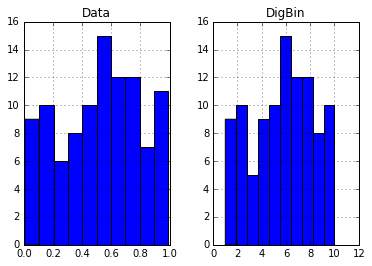

In [11]:
%matplotlib inline
df.hist() # now we can see before and after (left to right), should have the same shape
# note the x scale 0..12 vs 0..1.0

## B. Histograms...
You can also use histogram to do binning for you:

In [12]:
binH = (np.histogram(data, bins, weights = data)[0] / np.histogram(data, bins)[0])

In [13]:
len(binH), binH # where binH is he mean of the values in each bin

(10, array([ 0.04040002,  0.14799998,  0.2564637 ,  0.35427159,  0.44897324,
         0.54339197,  0.63648436,  0.75179231,  0.84773691,  0.94401007]))

## C. Using scipy:

In [14]:
# import numpy as np
from scipy.stats import binned_statistic
# we use the same data
binS = binned_statistic(data, data, bins = 10, range = (0, 1))[0]

### What is binned_statistic doing?
####  bin_count, bin_edges, bin_number

In [15]:
bc, be, bn = binned_statistic(data, None, statistic = 'count', bins = 10)


In [16]:
bc #, bc.sum() # =100

array([  9.,  10.,   6.,   8.,  10.,  15.,  12.,  12.,   7.,  11.])

In [17]:
be # the edges, not so tidy...

array([ 0.00620852,  0.10479581,  0.20338311,  0.3019704 ,  0.4005577 ,
        0.49914499,  0.59773229,  0.69631958,  0.79490688,  0.89349417,
        0.99208147])

In [18]:
bn # the bins

array([ 2,  7,  5,  8,  8,  3,  3,  9, 10,  9,  4,  6,  7,  8,  4,  6,  6,
        1,  8,  9,  4,  7,  1,  4, 10,  7,  4,  8,  4,  6,  9,  5,  9,  2,
        8,  8,  3, 10,  5, 10,  1,  2,  1,  7,  6,  6,  1,  6,  4,  6,  2,
        7,  6,  1,  7, 10,  8, 10, 10,  8,  3,  7,  5,  2,  4,  1,  5, 10,
        2,  2,  8,  6,  5,  2,  3, 10,  5,  6,  1,  3,  5,  7, 10,  7,  8,
        2,  8,  9,  7,  5,  2,  6,  6, 10,  5,  6,  6,  9,  1,  7])

In [19]:
df["SciBin"] = bn # put side by side with the previous df

In [20]:
df.head()

,Data,DigBin,SciBin
0,0.191519,2,2
1,0.622109,7,7
2,0.437728,5,5
3,0.785359,8,8
4,0.779976,8,8


In [21]:
df[df.DigBin != df.SciBin]

,Data,DigBin,SciBin
75,0.899965,9,10
79,0.300642,4,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc02e3da208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc02e32a358>]], dtype=object)

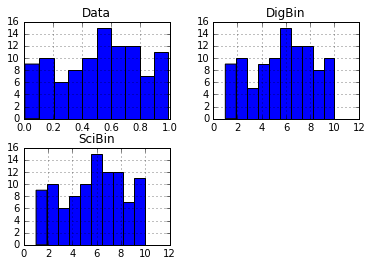

In [22]:
df.hist() # before and after again

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc02e212f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc02e212f28>)

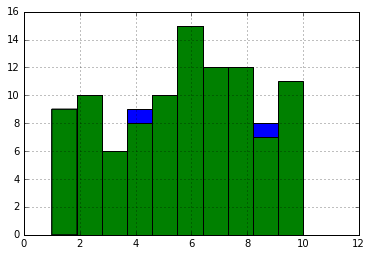

In [23]:
df.DigBin.hist(), df.SciBin.hist() # couple of blue peekers

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc02e1b35f8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc02e1b35f8>)

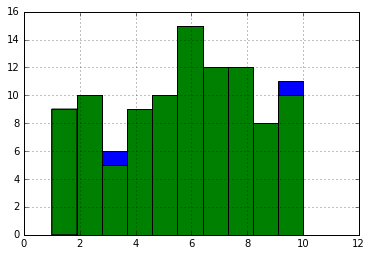

In [24]:
# do it the other way
df.SciBin.hist() ,df.DigBin.hist()

## Example: ages dataset


In [25]:
ages = [20, 22, 25, 26, 21, 23, 37, 31, 61, 45, 41, 32]

In [26]:
# Let’s divide these into bins of 18 to 25, 26 to 35, 35 to 60, and finally 60 and older. 
# To do so, you can use 'cut', a function in pandas:
bins = [18, 25, 35, 60, 100] # as above 5 numbers give us 4 bins
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [27]:
# cats is a struture showing which bin the values were placed in (the first three are 18-25)
# then the total of the data (12), which is just:
len(ages)
# then the categories or bins, as specified

12

In [28]:
cats.codes # 0 is the first bin, 3 the last

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [29]:
cats.categories # the names, note the use of '(' and ']'
# '(' means open, '[' means closed, or inclusive, exclusive

Index(['(18, 25]', '(25, 35]', '(35, 60]', '(60, 100]'], dtype='object')

In [30]:
pd.value_counts(cats) # and we can see there's only 1 60-100

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [31]:
# which side is closed can be changed 

In [32]:
cats2 = pd.cut(ages, [18, 26, 36, 61, 100], right = True)

In [33]:
pd.value_counts(cats2) # now 26 is in 18 - 26, 61 is in 36 - 61

(18, 26]     6
(36, 61]     4
(26, 36]     2
(61, 100]    0
dtype: int64

In [34]:
# want your own bin names?
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [35]:
# If you pass cut an integer number of bins instead of explicit bin edges, it will compute
# equal-length bins based on the minimum and maximum values in the data. 
# Consider the case of some uniformly distributed data chopped into tenths
# same data as above, 100 randoms

In [36]:
pd.cut(data, 10, precision = 5)

[(0.1048, 0.20338], (0.59773, 0.69632], (0.40056, 0.49914], (0.69632, 0.79491], (0.69632, 0.79491], ..., (0.49914, 0.59773], (0.49914, 0.59773], (0.79491, 0.89349], (0.0052226, 0.1048], (0.59773, 0.69632]]
Length: 100
Categories (10, object): [(0.0052226, 0.1048] < (0.1048, 0.20338] < (0.20338, 0.30197] < (0.30197, 0.40056] ... (0.59773, 0.69632] < (0.69632, 0.79491] < (0.79491, 0.89349] < (0.89349, 0.99208]]

In [37]:
bincut = pd.cut(data, 10, precision = 5)

In [38]:
bincut.codes # notice 0 to 9 (not 1 to 10) for bins, so they're out of synch by 1

array([1, 6, 4, 7, 7, 2, 2, 8, 9, 8, 3, 5, 6, 7, 3, 5, 5, 0, 7, 8, 3, 6, 0,
       3, 9, 6, 3, 7, 3, 5, 8, 4, 8, 1, 7, 7, 2, 9, 4, 9, 0, 1, 0, 6, 5, 5,
       0, 5, 3, 5, 1, 6, 5, 0, 6, 9, 7, 9, 9, 7, 2, 6, 4, 1, 3, 0, 4, 9, 1,
       1, 7, 5, 4, 1, 2, 9, 4, 5, 0, 2, 4, 6, 9, 6, 7, 1, 7, 8, 6, 4, 1, 5,
       5, 9, 4, 5, 5, 8, 0, 6], dtype=int8)

In [39]:
df.head()

,Data,DigBin,SciBin
0,0.191519,2,2
1,0.622109,7,7
2,0.437728,5,5
3,0.785359,8,8
4,0.779976,8,8


In [40]:
bincut.codes + 1 # hack them into order

array([ 2,  7,  5,  8,  8,  3,  3,  9, 10,  9,  4,  6,  7,  8,  4,  6,  6,
        1,  8,  9,  4,  7,  1,  4, 10,  7,  4,  8,  4,  6,  9,  5,  9,  2,
        8,  8,  3, 10,  5, 10,  1,  2,  1,  7,  6,  6,  1,  6,  4,  6,  2,
        7,  6,  1,  7, 10,  8, 10, 10,  8,  3,  7,  5,  2,  4,  1,  5, 10,
        2,  2,  8,  6,  5,  2,  3, 10,  5,  6,  1,  3,  5,  7, 10,  7,  8,
        2,  8,  9,  7,  5,  2,  6,  6, 10,  5,  6,  6,  9,  1,  7], dtype=int8)

In [41]:
df['BinCut'] = bincut.codes + 1

In [42]:
df.head() # are they the same? 

,Data,DigBin,SciBin,BinCut
0,0.191519,2,2,2
1,0.622109,7,7,7
2,0.437728,5,5,5
3,0.785359,8,8,8
4,0.779976,8,8,8


In [43]:
df[df.BinCut != df.DigBin] # 2 out of 100 don't match... oh well

,Data,DigBin,SciBin,BinCut
75,0.899965,9,10,10
79,0.300642,4,3,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc02e0ae080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc02df75ac8>]], dtype=object)

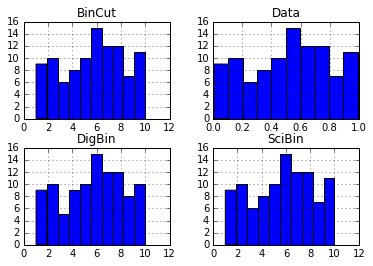

In [44]:
df.hist()

In [45]:
# A closely related function, qcut, bins the data based on sample quantiles. 
# Depending on the distribution of the data, using cut  will not usually result in each bin having the
# same number of data points. Since qcut  uses sample quantiles instead, by definition
# you will obtain roughly equal-size bins:

In [46]:
catsq = pd.qcut(data, 4) # Cut into quartiles

In [47]:
pd.value_counts(catsq) # 25 in each, means the edges/bins are not likely to be round or 'tidy' numbers

(0.74, 0.992]       25
(0.536, 0.74]       25
(0.313, 0.536]      25
[0.00621, 0.313]    25
dtype: int64

In [48]:
catsq

[[0.00621, 0.313], (0.536, 0.74], (0.313, 0.536], (0.74, 0.992], (0.74, 0.992], ..., (0.313, 0.536], (0.536, 0.74], (0.74, 0.992], [0.00621, 0.313], (0.536, 0.74]]
Length: 100
Categories (4, object): [[0.00621, 0.313] < (0.313, 0.536] < (0.536, 0.74] < (0.74, 0.992]]

In [49]:
# first one is 0.00621, 0.313, should match the min value
data.min()

0.0062085165871293979

In [50]:
# Similar to cut you can pass your own quantiles (numbers between 0 and 1, inclusive):
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(0.111, 0.536], (0.536, 0.901], (0.111, 0.536], (0.536, 0.901], (0.536, 0.901], ..., (0.111, 0.536], (0.536, 0.901], (0.536, 0.901], [0.00621, 0.111], (0.536, 0.901]]
Length: 100
Categories (4, object): [[0.00621, 0.111] < (0.111, 0.536] < (0.536, 0.901] < (0.901, 0.992]]

In [51]:
pd.value_counts(pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.]))

(0.536, 0.901]      40
(0.111, 0.536]      40
(0.901, 0.992]      10
[0.00621, 0.111]    10
dtype: int64

***
**Excercise:** Use  a discretisation method to define color ranges in PartA for plotting data on states map. 